# 1-Introduction

This kernel is a successive kernel of the [previous kernel on a serie of a number of tutorials on the scikit-learn library](https://www.kaggle.com/yassirarezki/a-beginner-tutorial-for-sklearn-1-introduction). In the current work, the different functions for preprocessing the data will be visited. 

Preprocessing the data is a crucial step in ML and much care should be brought to this step before moving to constructing the model.

I refere to the subsection 6.3 titled preprocessing in the skelarn user guide.

A first step is to import some tools namely: pandas (for dataframes management), numpy for caluclus and matplotlib and seaborn for visualisation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/insurance/insurance.csv


Let us import the data. I remind you that the data comes from [the medical cost personal dataset](https://www.kaggle.com/mirichoi0218/insurance). You can find the motication of this choice in my previous kernel.

In [3]:
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

Let us have a first look at the dataframe.

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

So the data gathers the information of a number of 1338 patients. This includes: 

* the sex, 

* the body mass index (BMI), 

* the number of children the patien has

* whether the patient is a smoker or not

* the region

* and finally the target variable which is the medical cost or charge.

So you might understand that this is a regression problem since we are trying to predict a continous variable (charges).

Let us just check the number of null varaibles that exist in the data set. This could be achived in two manners eithe using the isnull function of the info function. The second way provides additional information about the data such as the type of the data in each column.

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Let us now focus on the target variable: charges. We draw the histogram of this variable.

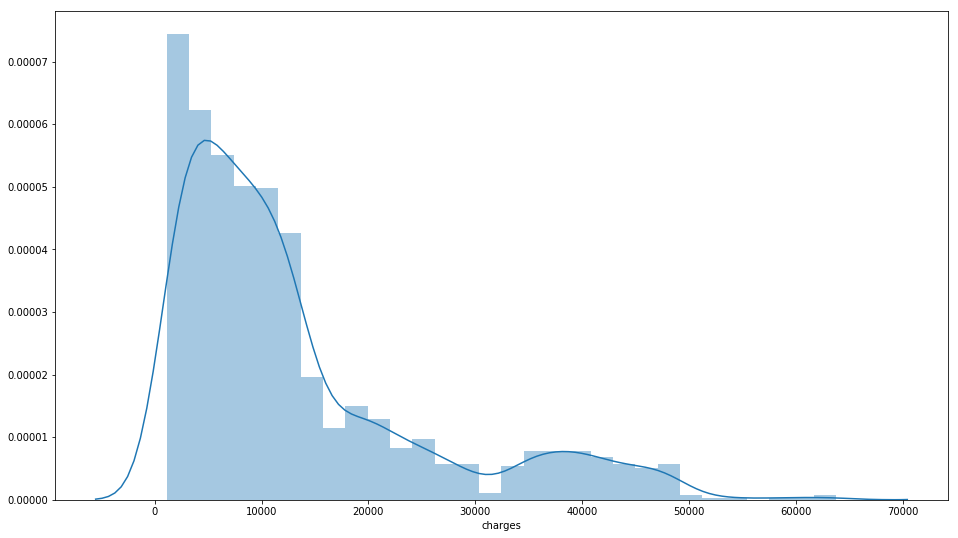

In [8]:
# We create a frame for the figure. The figsize is only to set the size of the figure.
plt.figure(figsize=(16,9))

# we use the function distplot from the sns library to plot the historgram in the previously specified space.
sns.distplot(df.charges)


# 2- Standardizing the data

The main objective of data standardization is to bring the mean to 0 and the varuiance to 1. This could be achived by substracting the mean of the raw data and divinding by the standard deviation of the raw data. standardization can boost the perforamnce of the algorithms. 

Let us first have a look at the mean and the standard devaition of the raw data.

In [9]:
print("The mean of the charges is {0:.2f}".format(df.charges.mean()))

The mean of the charges is 13270.42


In [10]:
print("The standard deviation of the charges is {0:.2f}".format(df.charges.std(),2))

The standard deviation of the charges is 12110.01


### In order to normalize the data we can use either:

* scale
* StandardScaler

The second function could be used in the following situation: Suppose we have two data set, we apply standardization on the first one and we would like to apply the same transformation to the second. This could not be performed using the former.

Let us go back to our data and let us apply the two functions on the charges variable.

In [11]:
# First, we need to import the scale from preprocessing that also belongs to sklearn
from sklearn.preprocessing import scale
charges_scaled = scale(df.charges)

Let us now check the mean and the standard devation of the resulting data:

In [12]:
print("The mean of the charges (scaled) is {0:.2}".format(charges_scaled.mean()))
print("The standard deviation of the charges (scaled) is {0:.2}".format(charges_scaled.std()))

The mean of the charges (scaled) is -7.8e-17
The standard deviation of the charges (scaled) is 1.0


** Note:** In the example above, the scale function was applied to the charges column only. However, it could be applied to more that one column and each one will be transformed seperately.

Now there is a question that might arise. Did the distribution change after applying this transormation? Let us check.

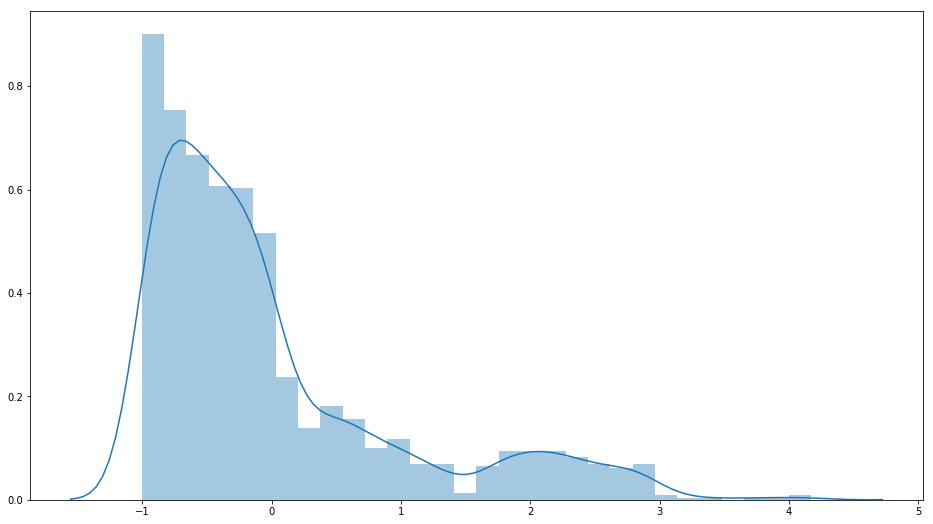

In [13]:
plt.figure(figsize=(16,9))
sns.distplot(charges_scaled)

The answer is No. Only the range of the axis moved. The layout of the distribution is similar as before applying the transformation.

Now, we show the benefits of using standadscaler. In this case, we do not apply a straight function as in the case of scale but we create a transformer (an object). 

In [14]:
from sklearn.preprocessing import StandardScaler
# Create a transformer and call it as you like. Here I used my_created_transformer
my_created_transformer = StandardScaler()
# Now we fit our tranformer to our data.
my_created_transformer.fit(df.charges)
# After that we can transform the data
charges_scaled = my_created_transformer.transform(df.charges)


ValueError: Expected 2D array, got 1D array instead:
array=[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

If you have tried to apply the previous command the code will not work. This is why I recommended the use of variable inspector in my previous tutorial. In fact the .fit() function takes only arrays while df.charges is a Serie. In order to cope with this, you should transform it to an array. This could be achived using:

    my_created_transformer.fit(df.charges.values)
    
Even though the code will not work because df.charges.values is an array with dimension (1338, ) while it should be (1338, 1). So you need to reshape the array in order to have that size.

In [15]:
from sklearn.preprocessing import StandardScaler
# Create a transformer and call it as you like. Here I used my_created_transformer
my_created_transformer = StandardScaler()
# Now we fit our tranformer to our data.
my_created_transformer.fit(df.charges.values.reshape(-1, 1))
# After that we can transform the data
charges_scaled = my_created_transformer.transform(df.charges.values.reshape(-1, 1))

A fast check:

In [16]:
print("The mean of the charges (scaled) is {0:.2}".format(charges_scaled.mean()))
print("The standard deviation of the charges (scaled) is {0:.2}".format(charges_scaled.std()))

The mean of the charges (scaled) is -7.8e-17
The standard deviation of the charges (scaled) is 1.0


Now if I want to apply the same transformation (the one obtained using charges) to an other variable (age for example), I can use my transformer previously created and fitted. All what I need is to apply transform on the new variable (age in this case) whitout the need to create a new transformer.

In [17]:
age_scaled = my_created_transformer.transform(df.age.values.reshape(-1, 1))

**A question:** do you think the variable age_scaled will have a mean 0 and a standard deviation of 1 as the charges variable?

I let you check this question.

If the answer is yes: You are completely wrong. Please add a comment if this point is left unclear.

**Note:** The standardScaler function allows the user to select whether to center the data (bring the mean to 0) or scale the data (bring the standard deviation to 1) by setting: with_std=False in the former case and setting with_mean=False in the latter.

Below is a code line for a transformer that uses centering only.

    scaler_with_centering_only = StandardScaler(with_std=False)


# 3- Scaling to a range

If we would like to set a condition on the maximum and minimum values whithin a data set, we can use scaling to a range. Scaling to a range, unlike to standardization, will preserve 0 values that exist in the data. 

The structure of the command is the same as for standardScaler. MinMaxScaler or MaxAbsScaler are used instead. 

In [18]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Create a new transformer. If you do not set any paramter, the data is scaled to the range [0, 1]. 
# in order to set a range, you need to include: feature_range=(min, max). In the example we use min=3, max=7
my_created_transformer = MinMaxScaler(feature_range=(3, 7))
# Fit the data to scaler
my_created_transformer.fit(df.charges.values.reshape(-1, 1))
#Transform the data
charges_scaled_range = my_created_transformer.transform(df.charges.values.reshape(-1, 1))


Let us have a look at the distribution of the data after applying the transformation:

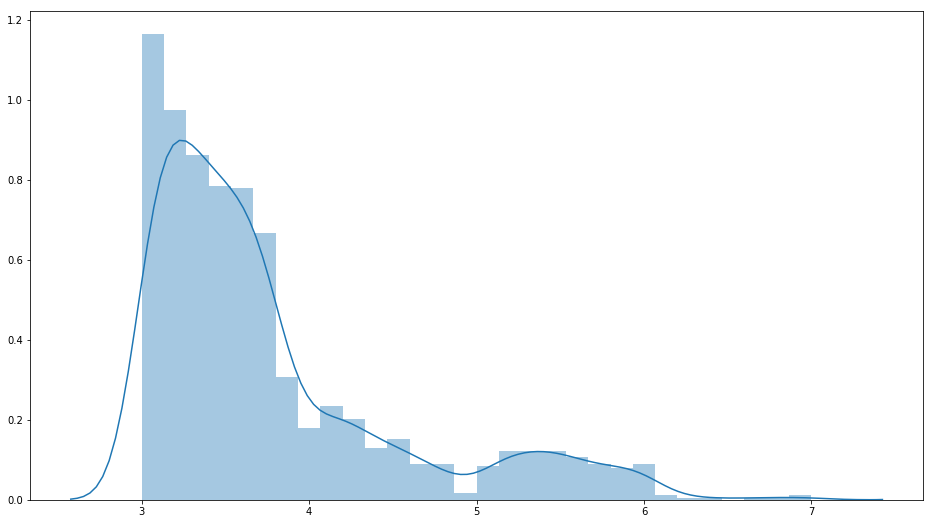

In [19]:
plt.figure(figsize=(16,9))
sns.distplot(charges_scaled_range)

Here, you can see on the X axis that the data is in the range [3, 7] as specified.

**Question:** If you use the same transformer (my_created_transformer that was fitted on the charges variable) to the age variable for instance, Would the scaled data be in the range [3, 7]? leave your answer in a comment.